<a href="https://colab.research.google.com/github/maggieesar/Energy-Production-and-GHG/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Abstract:** This project will focus on the power sources of the USA and China power plants used for electricity production and energy harvesting, as well as how much GHG they contribute. It also shows missing information on a lethal gas, methane, that is directly produced for electricity generation from these power plants, and other ways to track it. It will also analyze leading countries on renewable energy and make comparisons with the USA and China. The data was taken from climatetrace.org.
---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

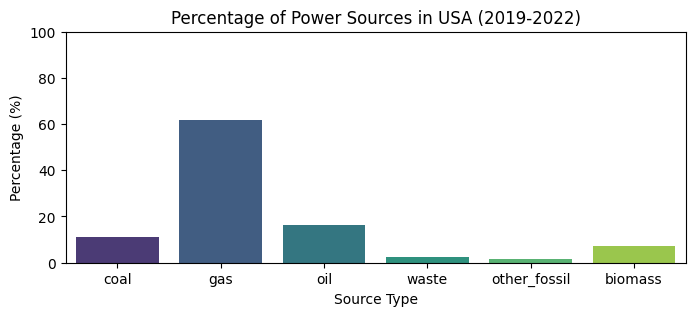

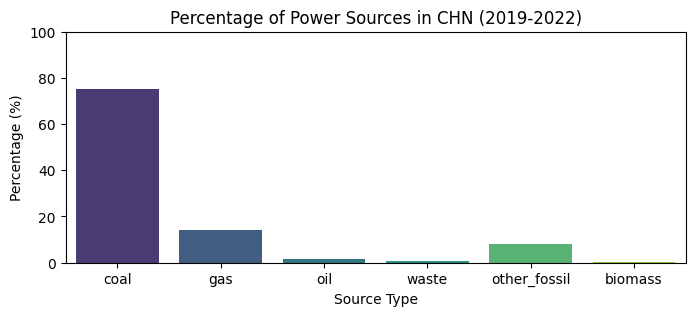

In [ ]:
# This function can be used to plot the percentage of power source types for any country.

df = pd.read_csv('electricity-generation_emissions_sources.csv')

def plot_power_source_percentages(df, country_code):
    country_data = df[df['iso3_country'] == country_code]

    source_counts = {
        'coal': 0,
        'gas': 0,
        'oil': 0,
        'waste': 0,
        'other_fossil': 0,
        'biomass': 0
    }

    def count_source_type(row):
        source_type = row['source_type']
        if 'coal' in source_type:
            source_counts['coal'] += 1
        if 'gas' in source_type:
            source_counts['gas'] += 1
        if 'oil' in source_type:
            source_counts['oil'] += 1
        if 'waste' in source_type:
            source_counts['waste'] += 1
        if 'other_fossil' in source_type:
            source_counts['other_fossil'] += 1
        if 'biomass' in source_type:
            source_counts['biomass'] += 1

    country_data.apply(count_source_type, axis=1)

    total_sources = sum(source_counts.values())

    source_percentages = {k: (v / total_sources) * 100 for k, v in source_counts.items()}

    plt.figure(figsize=(8, 3))      # Plot the percentages
    sns.barplot(x=list(source_percentages.keys()), y=list(source_percentages.values()), hue=list(source_percentages.keys()), palette='viridis', legend = False)
    plt.ylim(0, 100)
    plt.title(f'Percentage of Power Sources in {country_code} (2019-2022)')
    plt.xlabel('Source Type')
    plt.ylabel('Percentage (%)')
    plt.show()

plot_power_source_percentages(df, 'USA')
plot_power_source_percentages(df, 'CHN')

In [ ]:
avg_usa_emissions = df[df['iso3_country'] == 'USA']['emissions_quantity'].mean()
avg_china_emissions = df[df['iso3_country'] == 'CHN']['emissions_quantity'].mean()

print(f"Average USA Emissions from Electricity Generation: {avg_usa_emissions:}")
print(f"Average China Emissions from Electricity Generation: {avg_china_emissions:}")

usa_gas_and_oil_emissions = df[(df['iso3_country'] == 'USA') &
                               (df['source_type'].str.contains('gas', case=False, na=False))]['emissions_quantity'].sum()
china_coal_emissions = df[(df['iso3_country'] == 'CHN') &
                          (df['source_type'].str.contains('coal', case=False, na=False))]['emissions_quantity'].sum()
total_usa_emissions = df[df['iso3_country'] == 'USA']['emissions_quantity'].sum()
total_china_emissions = df[df['iso3_country'] == 'CHN']['emissions_quantity'].sum()

print(f"Percentage of USA Emissions from Gas: {(usa_gas_and_oil_emissions / total_usa_emissions) * 100:.3}%")
print(f"Percentage of China Emissions from Coal: {(china_coal_emissions / total_china_emissions) * 100:.3}%")

Average USA Emissions from Electricity Generation: 682521.0514337734
Average China Emissions from Electricity Generation: 3673694.868532655
Percentage of USA Emissions from Gas: 50.3%
Percentage of China Emissions from Coal: 97.9%


As shown from the graphs, China primarily relies on coal to power their electricity (approx 75 to 80% power plants are coal-fired) while the USA primarily relies on gas and oil(approx 60% power plants are gas-powered and approx 15% oil-powered). Consequently, these sources contribute the most emissions for electricity for each respective country. China's average emissions are 3.7 million tonnes while the USA's average emissions total only about 600,000 tonnes. Why is this? Although population and other factors come into play, China's use of coal-fired power plants are detrimental from an efficiency perspective. According to the MIT Climate Portal team, "[c]oal and natural gas both produce CO2 when burned, but coal produces over twice as much CO2 for every kilowatt-hour of electricity it produces." Ever since the USA replaced coal-fired power plants for natural gas, its emissions seemingly fell by 65%.


---


HOWEVER, the article warns "But recent research suggests those emissions reductions are inflated, thanks to another, more potent greenhouse gas associated with natural gas: methane" (climate.mit.edu).

In [ ]:
usa_ch4 = df[(df['iso3_country'] == 'USA') & (df['gas'] == 'ch4')]
china_ch4 = df[(df['iso3_country'] == 'CHN') & (df['gas'] == 'ch4')]

missing_usa_ch4 = usa_ch4['emissions_quantity'].isna().sum()
missing_china_ch4 = china_ch4['emissions_quantity'].isna().sum()

print(f"Number of missing values in emissions_quantity for CH4 in USA: {missing_usa_ch4}")
print(f"Number of missing values in emissions_quantity for CH4 in China: {missing_china_ch4}")

Number of missing values in emissions_quantity for CH4 in USA: 8788
Number of missing values in emissions_quantity for CH4 in China: 4716


In the electricity generation emissions dataset, all CH4 power plant emissions in the USA and China are missing. This makes it hard to identify how much lethal methane is being released into the air from these electricity power plants, but we can analyze fossil fuel operations and their emissions. Next, we will look at the oil and gas refining sector and the coal-mining sector.

In [ ]:
df2 = pd.read_csv('oil-and-gas-refining_country_emissions.csv')

usa = df2[df2['iso3_country'] == 'USA']
china = df2[df2['iso3_country'] == 'CHN']

usa_by_gas = usa.groupby('gas')['emissions_quantity'].sum().sort_values(ascending=False)
china_by_gas = china.groupby('gas')['emissions_quantity'].sum().sort_values(ascending=False)

other_by_gas = df2[(df2['iso3_country'] != 'USA') & (df2['iso3_country'] != 'CHN')]
other_by_gas = other_by_gas.groupby('gas')['emissions_quantity'].sum().sort_values(ascending=False)

usa_by_gas_tbl = usa_by_gas.reset_index().rename(columns={'emissions_quantity': 'Emissions Quantity'})
china_by_gas_tbl = china_by_gas.reset_index().rename(columns={'emissions_quantity': 'Emissions Quantity'})
other_by_gas_tbl = other_by_gas.reset_index().rename(columns={'emissions_quantity': 'Emissions Quantity'})

print("USA Emissions from Oil & Gas Refining by Gas Type:")
print(usa_by_gas_tbl)
print('----------------------------------------------------------')
print("\nChina Emissions from Oil & Gas Refining by Gas Type:")
print(china_by_gas_tbl)
print('----------------------------------------------------------')
print("\nWorld Emissions excluding USA & China from Oil & Gas Refining by Gas Type:")
print(other_by_gas_tbl)

methane_usa = usa_by_gas.loc['ch4'] if 'ch4' in usa_by_gas.index else 0
methane_china = china_by_gas.loc['ch4'] if 'ch4' in china_by_gas.index else 0
methane_other = other_by_gas.loc['ch4'] if 'ch4' in other_by_gas.index else 0
methane_world = df2.groupby('gas')['emissions_quantity'].sum().loc['ch4'] if 'ch4' in df2['gas'].unique() else 0

print('----------------------------------------------------------')
print(f'Percentage of Oil & Gas Refining CH4 Emissions from USA: {(methane_usa / methane_world) * 100:.2f}%')
print(f'Percentage of Oil & Gas Refining CH4 Emissions from China: {(methane_china / methane_world) * 100:.2f}%')
print(f'Percentage of Oil & Gas Refining CH4 Emissions from World Excluding USA & China: {(methane_other / methane_world) * 100:.2f}%')

print(f'Amount of USA Oil & Gas Emissions: {usa["emissions_quantity"].sum()}')
print(f'Amount of China Oil & Gas Emissions: {china["emissions_quantity"].sum()}')

USA Emissions from Oil & Gas Refining by Gas Type:
          gas  Emissions Quantity
0   co2e_20yr        1.512290e+09
1  co2e_100yr        1.499373e+09
2         co2        1.488808e+09
3         ch4        2.327232e+05
4         n2o        1.321403e+04
----------------------------------------------------------

China Emissions from Oil & Gas Refining by Gas Type:
          gas  Emissions Quantity
0   co2e_20yr        1.499585e+09
1  co2e_100yr        1.499473e+09
2         co2        1.483042e+09
3         ch4        7.605182e+04
4         n2o        1.359091e+04
----------------------------------------------------------

World Emissions excluding USA & China from Oil & Gas Refining by Gas Type:
          gas  Emissions Quantity
0   co2e_20yr        4.827591e+09
1  co2e_100yr        4.827308e+09
2         co2        4.769086e+09
3         ch4        2.724502e+05
4         n2o        4.620242e+04
----------------------------------------------------------
Percentage of Oil & Gas Refini

From the tables above, we can see that 43.12% of all methane emitted from oil and gas refining comes from these two countries alone, USA and China, but mostly the USA. Even though China emitted roughly the same amount of emissions as the US between 2015 to 2022 (about 4 billion tonnes), USA produced 40% of the world's vs China only emitting 13% of the world's. Methane is a natural gas, predominantly used for gas-fueled power plants and more potent than co2 in heating the climate. According to MIT Climate Portal, "When burned, this methane turns into CO2—but before then, it can escape into the atmosphere from all parts of gas infrastructure, like valves and pipes. And those leaks, too, need to be counted when we calculate how much natural gas is contributing to climate change." So, although gas is considered a cleaner alternative to coal, more methane is released into the air by using gases, and it's harder to keep track of methane leaks, leading to underreported levels of emissions. If methane leaks in the USA keep going undetected, it may no longer be an improvement over coal, and it is likely that the US contributes more than 40%.

In [ ]:
df3 = pd.read_csv('coal-mining_country_emissions.csv')

usa = df3[df3['iso3_country'] == 'USA']
china = df3[df3['iso3_country'] == 'CHN']

usa_by_gas = usa.groupby('gas')['emissions_quantity'].sum().sort_values(ascending=False)
china_by_gas = china.groupby('gas')['emissions_quantity'].sum().sort_values(ascending=False)

other_by_gas = df3[(df3['iso3_country'] != 'USA') & (df3['iso3_country'] != 'CHN')]
other_by_gas = other_by_gas.groupby('gas')['emissions_quantity'].sum().sort_values(ascending=False)

usa_by_gas_tbl = usa_by_gas.reset_index().rename(columns={'emissions_quantity': 'Emissions Quantity'})
china_by_gas_tbl = china_by_gas.reset_index().rename(columns={'emissions_quantity': 'Emissions Quantity'})
other_by_gas_tbl = other_by_gas.reset_index().rename(columns={'emissions_quantity': 'Emissions Quantity'})

print("USA Emissions from Coal-Mining by Gas Type:")
print(usa_by_gas_tbl)
print('----------------------------------------------------------')
print("\nChina Emissions from Coal-Mining by Gas Type:")
print(china_by_gas_tbl)
print('----------------------------------------------------------')
print("\nWorld Emissions excluding USA & China from Coal-Mining by Gas Type:")
print(other_by_gas_tbl)

methane_usa = usa_by_gas.loc['ch4'] if 'ch4' in usa_by_gas.index else 0
methane_china = china_by_gas.loc['ch4'] if 'ch4' in china_by_gas.index else 0
methane_other = other_by_gas.loc['ch4'] if 'ch4' in other_by_gas.index else 0
methane_world = df3.groupby('gas')['emissions_quantity'].sum().loc['ch4'] if 'ch4' in df3['gas'].unique() else 0

print('----------------------------------------------------------')
print(f'Percentage of Coal-Mining CH4 Emissions from USA: {(methane_usa / methane_world) * 100:.2f}%')
print(f'Percentage of Coal-Mining CH4 Emissions from China: {(methane_china / methane_world) * 100:.2f}%')
print(f'Percentage of Coal-Mining CH4 Emissions from World Excluding USA & China: {(methane_other / methane_world) * 100:.2f}%')

print(f'Amount of USA Coal-Mining Emissions: {usa["emissions_quantity"].sum()}')
print(f'Amount of China Coal-Mining Emissions: {china["emissions_quantity"].sum()}')

USA Emissions from Coal-Mining by Gas Type:
          gas  Emissions Quantity
0   co2e_20yr        2.006050e+09
1  co2e_100yr        6.686832e+08
2         ch4        2.388154e+07
3         co2        0.000000e+00
4         n2o        0.000000e+00
----------------------------------------------------------

China Emissions from Coal-Mining by Gas Type:
          gas  Emissions Quantity
0   co2e_20yr        2.151190e+10
1  co2e_100yr        7.170632e+09
2         ch4        2.560940e+08
3         co2        0.000000e+00
4         n2o        0.000000e+00
----------------------------------------------------------

World Emissions excluding USA & China from Coal-Mining by Gas Type:
          gas  Emissions Quantity
0   co2e_20yr        7.928662e+09
1  co2e_100yr        2.642887e+09
2         ch4        9.438883e+07
3         co2        0.000000e+00
4         n2o        0.000000e+00
----------------------------------------------------------
Percentage of Coal-Mining CH4 Emissions from USA: 6

Together, the USA and China contribute almost 3 quarters (74.79%) of all methane emissions from coal-mining between 2015 to 2022, with China as a massive contributor. USA's total coal-mining emissions is 2.6 billion tonnes while China's total is 28 billion tonnes. These are big differences, but it is consistent with the bar plot from above. Given their abundant coal reserves, China is heavily dependent on coal.

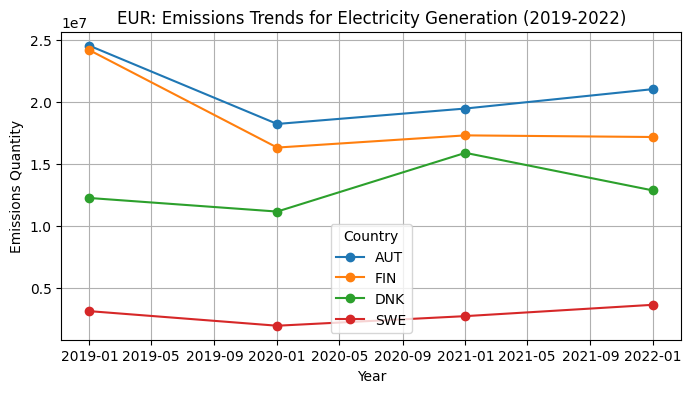

In [ ]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

def plot_emissions_trends(df, countries):
  filtered_data = df[df['iso3_country'].isin(countries)].copy()
  filtered_data.loc[:, 'year_month'] = filtered_data['start_time'].dt.to_period('M')

  aggregated_data = filtered_data.groupby(['year_month', 'iso3_country'])['emissions_quantity'].sum().reset_index()
  aggregated_data['year_month'] = aggregated_data['year_month'].dt.to_timestamp()

  plt.figure(figsize=(8, 4))

  for country in countries:
    country_data = aggregated_data[aggregated_data['iso3_country'] == country]
    plt.plot(country_data['year_month'], country_data['emissions_quantity'], marker='o', label=country)

  plt.xlabel('Year')
  plt.ylabel('Emissions Quantity')
  plt.title('EUR: Emissions Trends for Electricity Generation (2019-2022)')
  plt.legend(title='Country')
  plt.grid(True)
  plt.show()

countries = ['AUT', 'FIN', 'DNK', 'SWE']
plot_emissions_trends(df, countries)

Looking on the bright side, here are five randomly selected european countries (Austria, Finland, Denmark, Sweden) that produce annual emissions less than 3 millions tonnes. Sweden is at the bottom, which is consistent with an article by climatecouncil.org.au. According to climatecouncil.org.au, Sweden is on track of reaching their 2040 goal of becoming 100% fossil-free: "In 2012 Sweden reached their target of 50% renewable energy 8 years ahead of schedule."


---


If we add in the UK (in blue below), we get a much different looking graph that has a 160 million emissions gap in 2019. Since 2019, it has lowered.

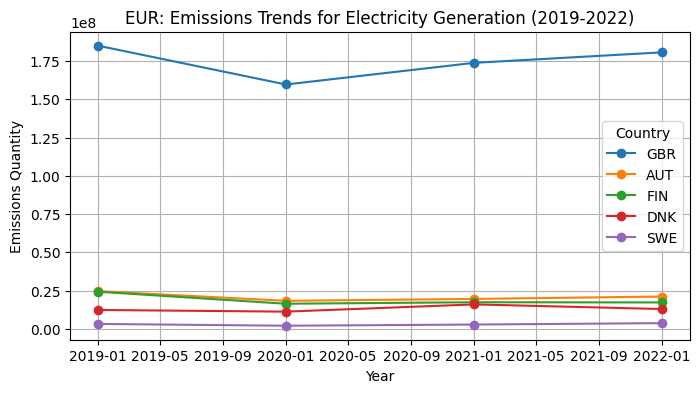

Difference in Austria and UK electricity emissions in 2019: 159660000.0


In [ ]:
plot_emissions_trends(df, ['GBR', 'AUT', 'FIN', 'DNK', 'SWE'])
a = df[(df['iso3_country'] == 'AUT') & (df['start_time'].dt.year == 2019)]['emissions_quantity'].sum()
u = df[(df['iso3_country'] == 'GBR') & (df['start_time'].dt.year == 2019)]['emissions_quantity'].sum()

difference = u - a
print(f'Difference in Austria and UK electricity emissions in 2019: {difference}')

China, USA, and the UK below.

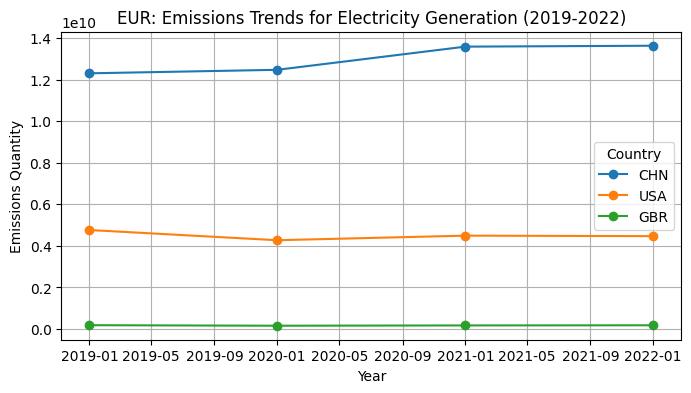

Difference in China and UK electricity generation emissions 2022: 13445523000.0
Difference in USA and UK electricity generation emissions 2022: 4287192000.0


In [ ]:
plot_emissions_trends(df, ['CHN', 'USA', 'GBR'])
c = df[(df['iso3_country'] == 'CHN') & (df['start_time'].dt.year == 2022)]['emissions_quantity'].sum()
u = df[(df['iso3_country'] == 'GBR') & (df['start_time'].dt.year == 2022)]['emissions_quantity'].sum()
us = df[(df['iso3_country'] == 'USA') & (df['start_time'].dt.year == 2022)]['emissions_quantity'].sum()

print(f'Difference in China and UK electricity generation emissions 2022: {c - u}')
print(f'Difference in USA and UK electricity generation emissions 2022: {us - u}')

These graphs show perspective and the differences in how much emissions countries release for electricity. How did Sweden do it? According to the Swedish Institute, their green energy sources are wind power, bioenergy, solar energy, wave power, heat pumps, ethanol, hydrogen, and body heat. Interestingly, they use body heat from commuters to heat nearby buildings. Since Sweden has a large supply of water and biomass, their top renewable sources are hydropower and bioenergy (https://sweden.se/climate/sustainability/energy-use-in-sweden).

Sources:

*   https://climate.mit.edu/ask-mithow-much-does-natural-gas-contribute-climate-change-through-co2-emissions-when-fuel-burned
*   https://www.climatecouncil.org.au/11-countries-leading-the-charge-on-renewable-energy/
* https://sweden.se/climate/sustainability/energy-use-in-sweden
